In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
root_dir = Path("results_from_norm/")

In [3]:
ss_components = np.load(root_dir.joinpath("space_shape_components.npy"))
ss_variance = np.load(root_dir.joinpath("space_shape_variance.npy"))
ts_components = np.load(root_dir.joinpath("space_traj_components.npy"))
ts_variance = np.load(root_dir.joinpath("space_traj_variance.npy"))

original_space_shape = np.array([97, 30, 49, 2])

In [4]:
ss_components.shape

(8, 98)

In [5]:
ss_df = pd.DataFrame(ss_components.reshape(-1, 2))
ss_df.columns = ["x", "y"]
ss_df["ss_comp"] = np.repeat(
    np.arange(1, ss_components.shape[0] + 1), original_space_shape[2]
)
ss_df["pnt"] = np.repeat(
    [np.arange(1, original_space_shape[2] + 1)], ss_components.shape[0], axis=0
).flatten()
ss_df = ss_df.groupby(["ss_comp", "pnt"]).sum()
ss_df["squared_sum"] = ss_df["x"] ** 2 + ss_df["y"] ** 2
(ss_df[["x", "y"]] ** 2).groupby("ss_comp").sum()

,x,y
ss_comp,,
1,0.676255,0.323745
2,0.473248,0.526752
3,0.843820,0.156180
4,0.555171,0.444829
5,0.445147,0.554853
6,0.283029,0.716971
7,0.665931,0.334069
8,0.627932,0.372068


In [6]:
ss_df

x         y  squared_sum
ss_comp pnt                                 
1       1    0.023552  0.152800     0.023903
        2    0.017379  0.148746     0.022427
        3    0.011802  0.128866     0.016746
        4    0.030640  0.122573     0.015963
        5    0.049687  0.114312     0.015536
...               ...       ...          ...
8       45   0.029841 -0.001213     0.000892
        46  -0.021138  0.043365     0.002327
        47  -0.110203  0.066478     0.016564
        48  -0.179372  0.072467     0.037426
        49  -0.238045  0.045884     0.058771

[392 rows x 3 columns]

In [7]:
ts_components.shape

(8, 240)

In [8]:
ts_df = pd.DataFrame(ts_components.reshape(-1, len(ss_variance)))

ts_df.columns = [f"ss{i}" for i in range(len(ss_variance))]
ts_df["ts_comp"] = np.repeat(
    np.arange(1, ts_components.shape[0] + 1), original_space_shape[1]
)
ts_df["time"] = np.repeat(
    [np.arange(1, original_space_shape[1] + 1)], ts_components.shape[0], axis=0
).flatten()
ts_df = ts_df.groupby(["ts_comp", "time"]).sum()
ts_df["squared_sum"] = (ts_df**2).sum(axis=1)
ts_df

ss0       ss1       ss2       ss3       ss4       ss5  \
ts_comp time                                                               
1       1     0.161947  0.105156  0.054067 -0.029583  0.068836  0.036199   
        2     0.133437  0.140313  0.103926 -0.080724  0.062629  0.064165   
        3     0.082637  0.135092  0.124521 -0.116354  0.039137  0.078944   
        4     0.019806  0.094387  0.115724 -0.132035  0.008822  0.078486   
        5    -0.046809  0.039326  0.093070 -0.129448 -0.017472  0.064375   
...                ...       ...       ...       ...       ...       ...   
8       26   -0.172902  0.010108  0.066067 -0.113501 -0.060599 -0.006798   
        27   -0.161237 -0.017153  0.068481 -0.126180 -0.079545 -0.009579   
        28   -0.109927 -0.030712  0.034734 -0.094607 -0.063817 -0.017013   
        29   -0.024346 -0.009615 -0.030396 -0.028620 -0.012246 -0.021499   
        30    0.070271  0.030839 -0.091412  0.035748  0.049413 -0.015060   

                   ss6       ss7  squared_sum  
ts_comp time                                   
1       1     0.043814 -0.046022     0.051170  
        2     0.061105 -0.051063     0.069191  
        3     0.060705 -0.032237     0.066611  
        4     0.053153 -0.002617     0.049196  
        5     0.049292  0.017538     0.036343  
...                ...       ...          ...  
8       26   -0.016330 -0.074789     0.056823  
        27   -0.015920 -0.036360     0.054897  
        28   -0.014535  0.018636     0.028105  
        29   -0.017390  0.042290     0.005131  
        30   -0.016653  0.022648     0.018982  

[240 rows x 9 columns]

In [9]:
ss_variance

array([0.34434613, 0.20568095, 0.08454346, 0.06884719, 0.04045282,
       0.03721697, 0.03003337, 0.02218794])

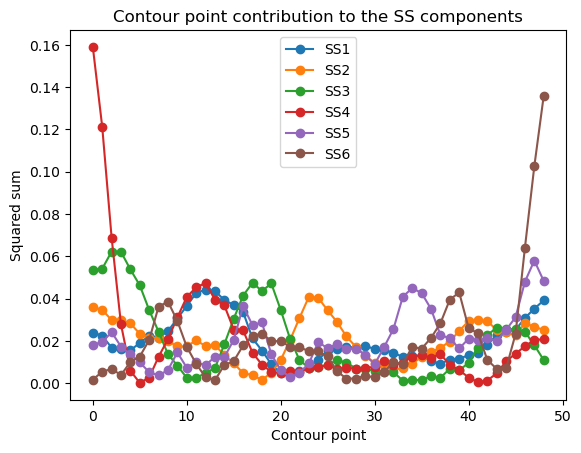

In [10]:
for i, comp in enumerate(ss_components.reshape(-1, 49, 2)[:6]):
    squared_sum = np.sum(comp**2, axis=1)
    variance = ss_variance[i]
    # plt.plot(squared_sum, label=f'SS{i+1} ({variance*100:0.0f}%)', marker='o')
    plt.plot(squared_sum, label=f"SS{i+1}", marker="o")
plt.legend()
plt.xlabel("Contour point")
plt.ylabel("Squared sum")
title = "Contour point contribution to the SS components"
plt.title(title)
plt.savefig(root_dir.joinpath(title + ".png"))

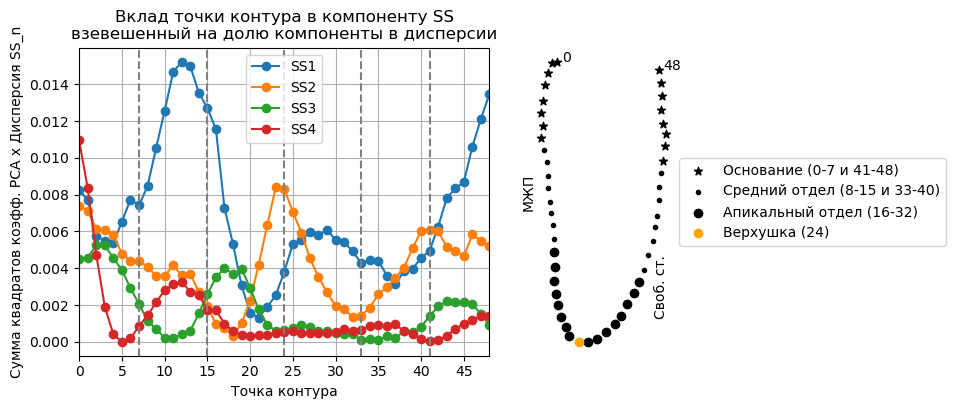

In [11]:
from matplotlib import gridspec

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
for i, comp in enumerate(ss_components.reshape(-1, 49, 2)[:4]):
    squared_sum = np.sum(comp**2, axis=1)
    variance = ss_variance[i]
    # ax0.plot(squared_sum * variance, label=f'SS{i+1} ({variance*100:0.0f}%)', marker='o')
    ax0.plot(squared_sum * variance, label=f"SS{i+1}", marker="o")
ax0.legend()
# plt.xlabel('Contour point')
ax0.set_xlabel("Точка контура")
# plt.ylabel('Squared sum')
ax0.set_ylabel("Сумма квадратов коэфф. PCA x Дисперсия SS_n")
title = (
    "Contour point contribution to the SS components\nweighted by SS component variance"
)
title = (
    "Вклад точки контура в компоненту SS\nвзевешенный на долю компоненты в дисперсии"
)
ax0.set_xticks(np.arange(0, 50, 5))
ax0.grid()
ax0.set_title(title)
xlim = ax0.get_xlim()
ylim = ax0.get_ylim()
ax0.plot([7, 7], ylim, color="grey", linestyle="--")
ax0.plot([41, 41], ylim, color="grey", linestyle="--")
ax0.plot([15, 15], ylim, color="grey", linestyle="--")
ax0.plot([33, 33], ylim, color="grey", linestyle="--")
ax0.plot([24, 24], ylim, color="grey", linestyle="--")
ax0.set_xlim([0, 48])
ax0.set_ylim(ylim)

data = np.load(
    root_dir.joinpath("data/contours_fourier_interpolated.npy"), allow_pickle=True
)[0]["coordinates"]
points = data[0]
ax1.scatter(
    *points[[0, 1, 2, 3, 4, 5, 6, 7, 48, 47, 46, 45, 44, 43, 42, 41]].T,
    label="Основание (0-7 и 41-48)",
    color="black",
    marker="*",
)
ax1.scatter(
    *points[[8, 9, 10, 11, 12, 13, 14, 15, 40, 39, 38, 37, 36, 35, 34, 33]].T,
    label="Средний отдел (8-15 и 33-40)",
    color="black",
    marker=".",
)
ax1.scatter(
    *points[[16, 17, 18, 19, 20, 21, 22, 23, 32, 31, 30, 29, 28, 27, 26, 25]].T,
    label="Апикальный отдел (16-32)",
    color="black",
    marker="o",
)
ax1.scatter(*points[24], label="Верхушка (24)", color="orange", marker="o")
ax1.text(-3, 0, "МЖП", rotation=90)
ax1.text(2.4, -2.8, "Своб. ст.", rotation=90)
ax1.text(points[0][0] + 0.2, points[0][1], "0")
ax1.text(points[-1][0] + 0.2, points[-1][1], "48")
ax1.legend(loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True)

# ax1.scatter(*data[0].T)
ax1.axis("off")
fig.savefig(root_dir.joinpath(title + ".png"))

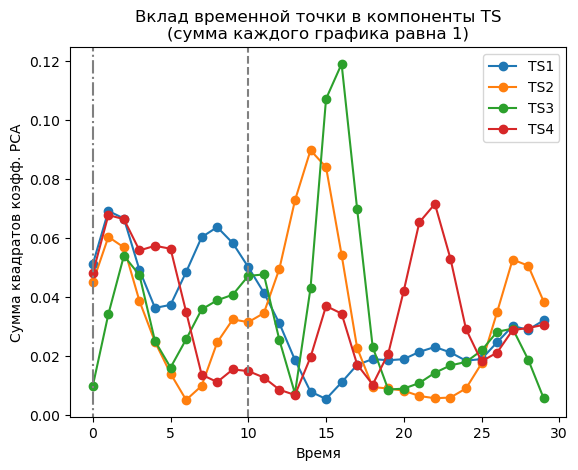

In [12]:
n_ts_comps = 4
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    # plt.plot(np.sum(comp[:,:len(ss_variance)] ** 2, axis=1), label=f'TS{i+1} ({ts_variance[i]*100:0.0f}%)', marker='o')
    plt.plot(
        np.sum(comp[:, : len(ss_variance)] ** 2, axis=1), label=f"TS{i+1}", marker="o"
    )
plt.legend()
# plt.xlabel('Time')
plt.xlabel("Время")
# plt.ylabel('Squared sum')
plt.ylabel("Сумма квадратов коэфф. PCA")
# title = 'Timepoint contribution to the TS components\n(each graph sums to 1)'
title = "Вклад временной точки в компоненты TS\n(сумма каждого графика равна 1)"
plt.title(title)
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot([10, 10], ylim, color="grey", linestyle="--", label="КС")
plt.plot([0, 0], xlim, color="grey", linestyle="-.", label="КД")
plt.xlim(xlim)
plt.ylim(ylim)

plt.savefig(root_dir.joinpath(title + ".png"))

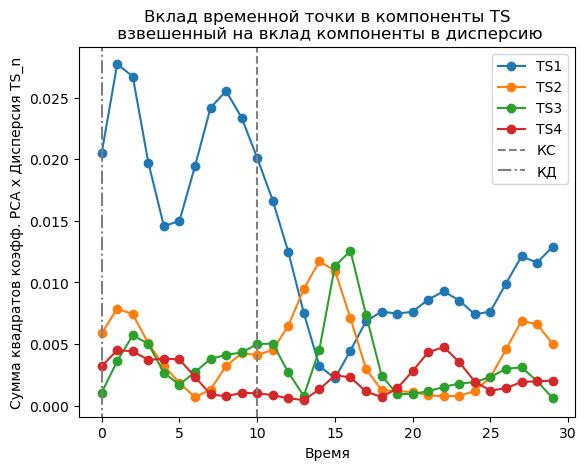

In [13]:
n_ts_comps = 4
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    squared_sum = np.sum(comp[:, : len(ss_variance)] ** 2, axis=1)
    variance = ts_variance[i]
    # plt.plot(squared_sum * variance, label=f'TS{i+1} ({variance*100:0.0f}%)', marker='o')
    plt.plot(squared_sum * variance, label=f"TS{i+1}", marker="o")
# plt.xlabel('Time')
plt.xlabel("Время")
# plt.ylabel('Squared sum')
plt.ylabel("Сумма квадратов коэфф. PCA x Дисперсия TS_n")
# title = 'Timepoint contribution to the TS components'
title = (
    "Вклад временной точки в компоненты TS\n взвешенный на вклад компоненты в дисперсию"
)
plt.title(title)
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot([10, 10], ylim, color="grey", linestyle="--", label="КС")
plt.plot([0, 0], xlim, color="grey", linestyle="-.", label="КД")
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()

plt.savefig(root_dir.joinpath(title + ".png"))

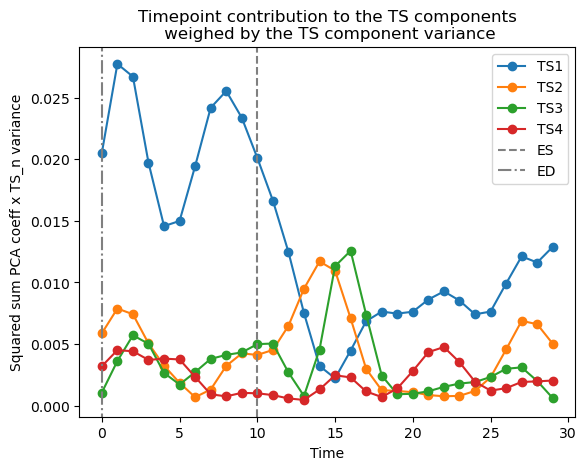

In [18]:
n_ts_comps = 4
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    squared_sum = np.sum(comp[:, : len(ss_variance)] ** 2, axis=1)
    variance = ts_variance[i]
    # plt.plot(squared_sum * variance, label=f'TS{i+1} ({variance*100:0.0f}%)', marker='o')
    plt.plot(squared_sum * variance, label=f"TS{i+1}", marker="o")
# plt.xlabel('Time')
plt.xlabel("Time")
# plt.ylabel('Squared sum')
plt.ylabel("Squared sum PCA coeff x TS_n variance")
# title = 'Timepoint contribution to the TS components'
title = (
    "Timepoint contribution to the TS components\n weighed by the TS component variance"
)
plt.title(title)
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot([10, 10], ylim, color="grey", linestyle="--", label="ES")
plt.plot([0, 0], xlim, color="grey", linestyle="-.", label="ED")
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()

plt.savefig(root_dir.joinpath(title + ".png"))

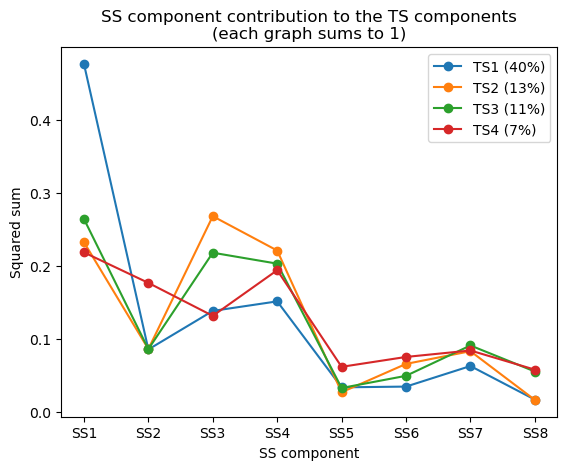

In [14]:
n_ts_comps = 4
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    squared_sum = np.sum(comp[:, : len(ss_variance)] ** 2, axis=0)
    variance = ts_variance[i]
    plt.plot(squared_sum, label=f"TS{i+1} ({variance*100:0.0f}%)", marker="o")
plt.legend()
plt.xlabel("SS component")
plt.ylabel("Squared sum")
title = "SS component contribution to the TS components\n(each graph sums to 1)"
plt.title(title)
plt.xticks(np.arange(len(ss_variance)), [f"SS{d+1}" for d in range(len(ss_variance))])
plt.savefig(root_dir.joinpath(title + ".png"))

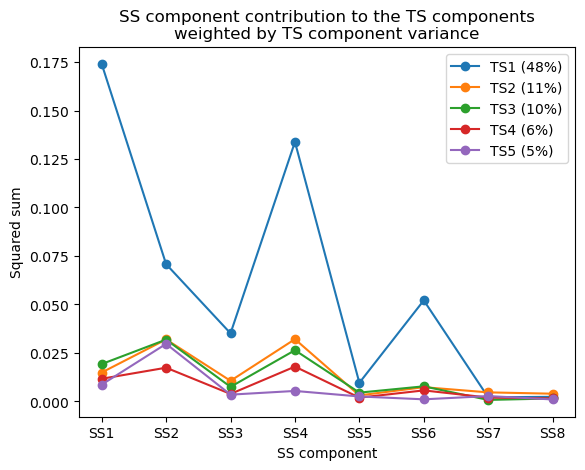

In [115]:
n_ts_comps = 5
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    squared_sum = np.sum(comp[:, : len(ss_variance)] ** 2, axis=0)
    variance = ts_variance[i]
    plt.plot(
        squared_sum * variance, label=f"TS{i+1} ({variance*100:0.0f}%)", marker="o"
    )
plt.legend()
plt.xlabel("SS component")
plt.ylabel("Squared sum")
title = (
    "SS component contribution to the TS components\nweighted by TS component variance"
)
plt.title(title)
plt.xticks(np.arange(len(ss_variance)), [f"SS{d+1}" for d in range(len(ss_variance))])
plt.savefig(root_dir.joinpath(title + ".png"))

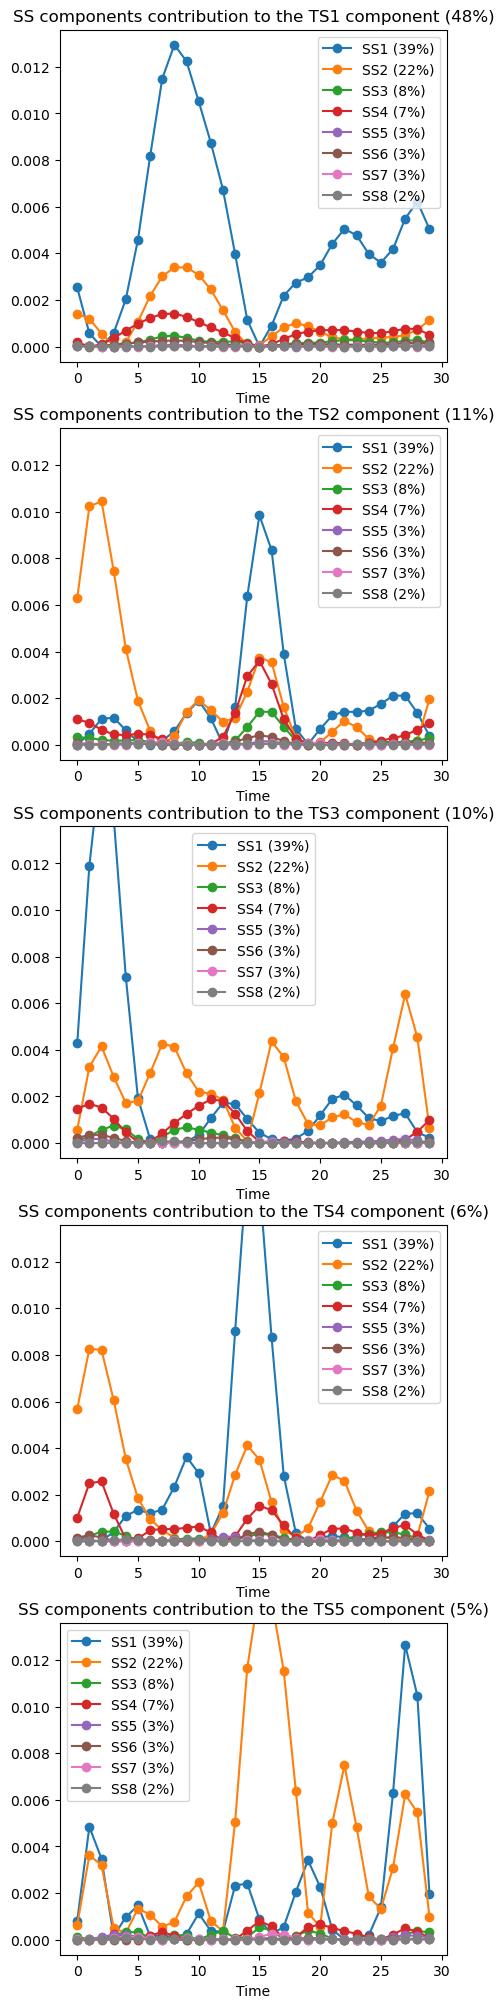

In [116]:
n_ss_comps = 4
n_ts_comps = 5
box_size = 5
plt.figure(figsize=(box_size, box_size * n_ts_comps))
title = f"SS components contribution to TS components shown in time.png"
for i, ts_comp in enumerate(
    ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]
):
    plt.subplot(n_ts_comps, 1, i + 1)
    for j, ss_comp in enumerate(ts_comp.T):
        variance = ts_variance[i]
        squares = ss_comp**2
        # plt.plot(squares * variance, label=f'SS{j+1} ({ss_variance[j]*100:0.0f}%)', marker='o')
        plt.plot(
            squares * ss_variance[j],
            label=f"SS{j+1} ({ss_variance[j]*100:0.0f}%)",
            marker="o",
        )
        plt.legend()
        plt.xlabel("Time")
        # plt.ylabel(f'SS{i+1}')
        plt.title(
            f"SS components contribution to the TS{i+1} component ({ts_variance[i]*100:0.0f}%)"
        )
    if i == 0:
        ylim = plt.ylim()
    else:
        plt.ylim(ylim)
plt.savefig(root_dir.joinpath(title))